#Proyecto

###Integrantes:
* Tomás Jiménez Álvarez

##**Anteproyecto**

###Librerías

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import warnings
import os
warnings.filterwarnings("ignore")

#librerias para proceso
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score, cross_val_predict #particionar
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedShuffleSplit #método para participación estratificado
from sklearn.preprocessing import LabelEncoder #Método para pasar de variables categóricas a continuas

###Importamos la base de datos

In [ ]:
#@markdown TRAIN
!gdown --id "1rQpazA6JhEWnveHqJ4CUXSHqLCsccjl1"
!wget "https://drive.google.com/file/d/1rQpazA6JhEWnveHqJ4CUXSHqLCsccjl1"

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1rQpazA6JhEWnveHqJ4CUXSHqLCsccjl1
To: /content/train.csv
100% 12.2M/12.2M [00:00<00:00, 32.0MB/s]
--2023-05-31 19:19:14--  https://drive.google.com/file/d/1rQpazA6JhEWnveHqJ4CUXSHqLCsccjl1
Resolving drive.google.com (drive.google.com)... 64.233.188.113, 64.233.188.102, 64.233.188.101, ...
Connecting to drive.google.com (drive.google.com)|64.233.188.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://drive.google.com/file/d/1rQpazA6JhEWnveHqJ4CUXSHqLCsccjl1/ [following]
--2023-05-31 19:19:14--  https://drive.google.com/file/d/1rQpazA6JhEWnveHqJ4CUXSHqLCsccjl1/
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 302 Moved Temporarily


In [ ]:
#@markdown TEST
!gdown --id "1VeBtSEJjprdW0LolJEVhYiQNzm2tcdU0"
!wget "https://drive.google.com/file/d/1VeBtSEJjprdW0LolJEVhYiQNzm2tcdU0"

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1VeBtSEJjprdW0LolJEVhYiQNzm2tcdU0
To: /content/test.csv
100% 3.04M/3.04M [00:00<00:00, 87.3MB/s]
--2023-05-31 19:19:18--  https://drive.google.com/file/d/1VeBtSEJjprdW0LolJEVhYiQNzm2tcdU0
Resolving drive.google.com (drive.google.com)... 64.233.188.113, 64.233.188.102, 64.233.188.101, ...
Connecting to drive.google.com (drive.google.com)|64.233.188.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://drive.google.com/file/d/1VeBtSEJjprdW0LolJEVhYiQNzm2tcdU0/ [following]
--2023-05-31 19:19:18--  https://drive.google.com/file/d/1VeBtSEJjprdW0LolJEVhYiQNzm2tcdU0/
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 302 Moved Temporarily
L

###Cargamos el archivo CSV en un DataFrame de pandas

In [ ]:
#@markdown TRAIN
database_train = '/content/train.csv'
database_test = '/content/test.csv'

data_train = pd.read_csv(database_train)
data_train.head() #encabezado principal -> Me permite ver las primeras 5 filas del CSV

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
#@markdown TEST
data_test = pd.read_csv(database_test)
data_test.head() #encabezado principal -> Me permite ver las primeras 5 filas del CSV

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


##Análisis Exploratorio

###Observando las muestras y atributos

In [ ]:
#@markdown Observamos nuestros datos
data_train.info() #revisar cantidad de datos, tipos de datos, campos vacios-> Puedo obtener información sobre el # de filas , el # de columnas, datos nulos
'''
No-Null -> Debe de estar igual al total de datos
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

'\nNo-Null -> Debe de estar igual al total de datos\n'

Para este caso la mayoría de los datos se encuentran completos excepto un solo atributo **Arrival Delay in Minutes** y tenemos los siguientes tipos de datos:


*  Enteros: 19
*  Objeto: 5
*  Flotantes: 1



###Media, mediana y moda de nuestro Dataset

In [ ]:
#@markdown Media, mediana y moda de las variables
data_train.describe() # Me entrega la estadística básica de las variables -> (media,desviación estándar(std),cuartiles, Vmax)

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


###Avistamiento y observación de satisfaction

In [ ]:
#@markdown Avistamiento de la variable de interés (satisfaction)
var_interes = 'satisfaction'
data_train.loc[ [0,10,100,1000,2000,3000,5000,10000] , [var_interes] ]# con el método iloc se puede indexar igual que en la librería numpy

,satisfaction
0,neutral or dissatisfied
10,neutral or dissatisfied
100,neutral or dissatisfied
1000,neutral or dissatisfied
2000,satisfied
3000,neutral or dissatisfied
5000,neutral or dissatisfied
10000,satisfied


Nuestra variable de interés es la variable: **'satisfaction'** que puede tomar 2 valores:
* Satisfied
* Neutral or dissatisfaction


###Revisamos los histogramas de las variables cuantitativas

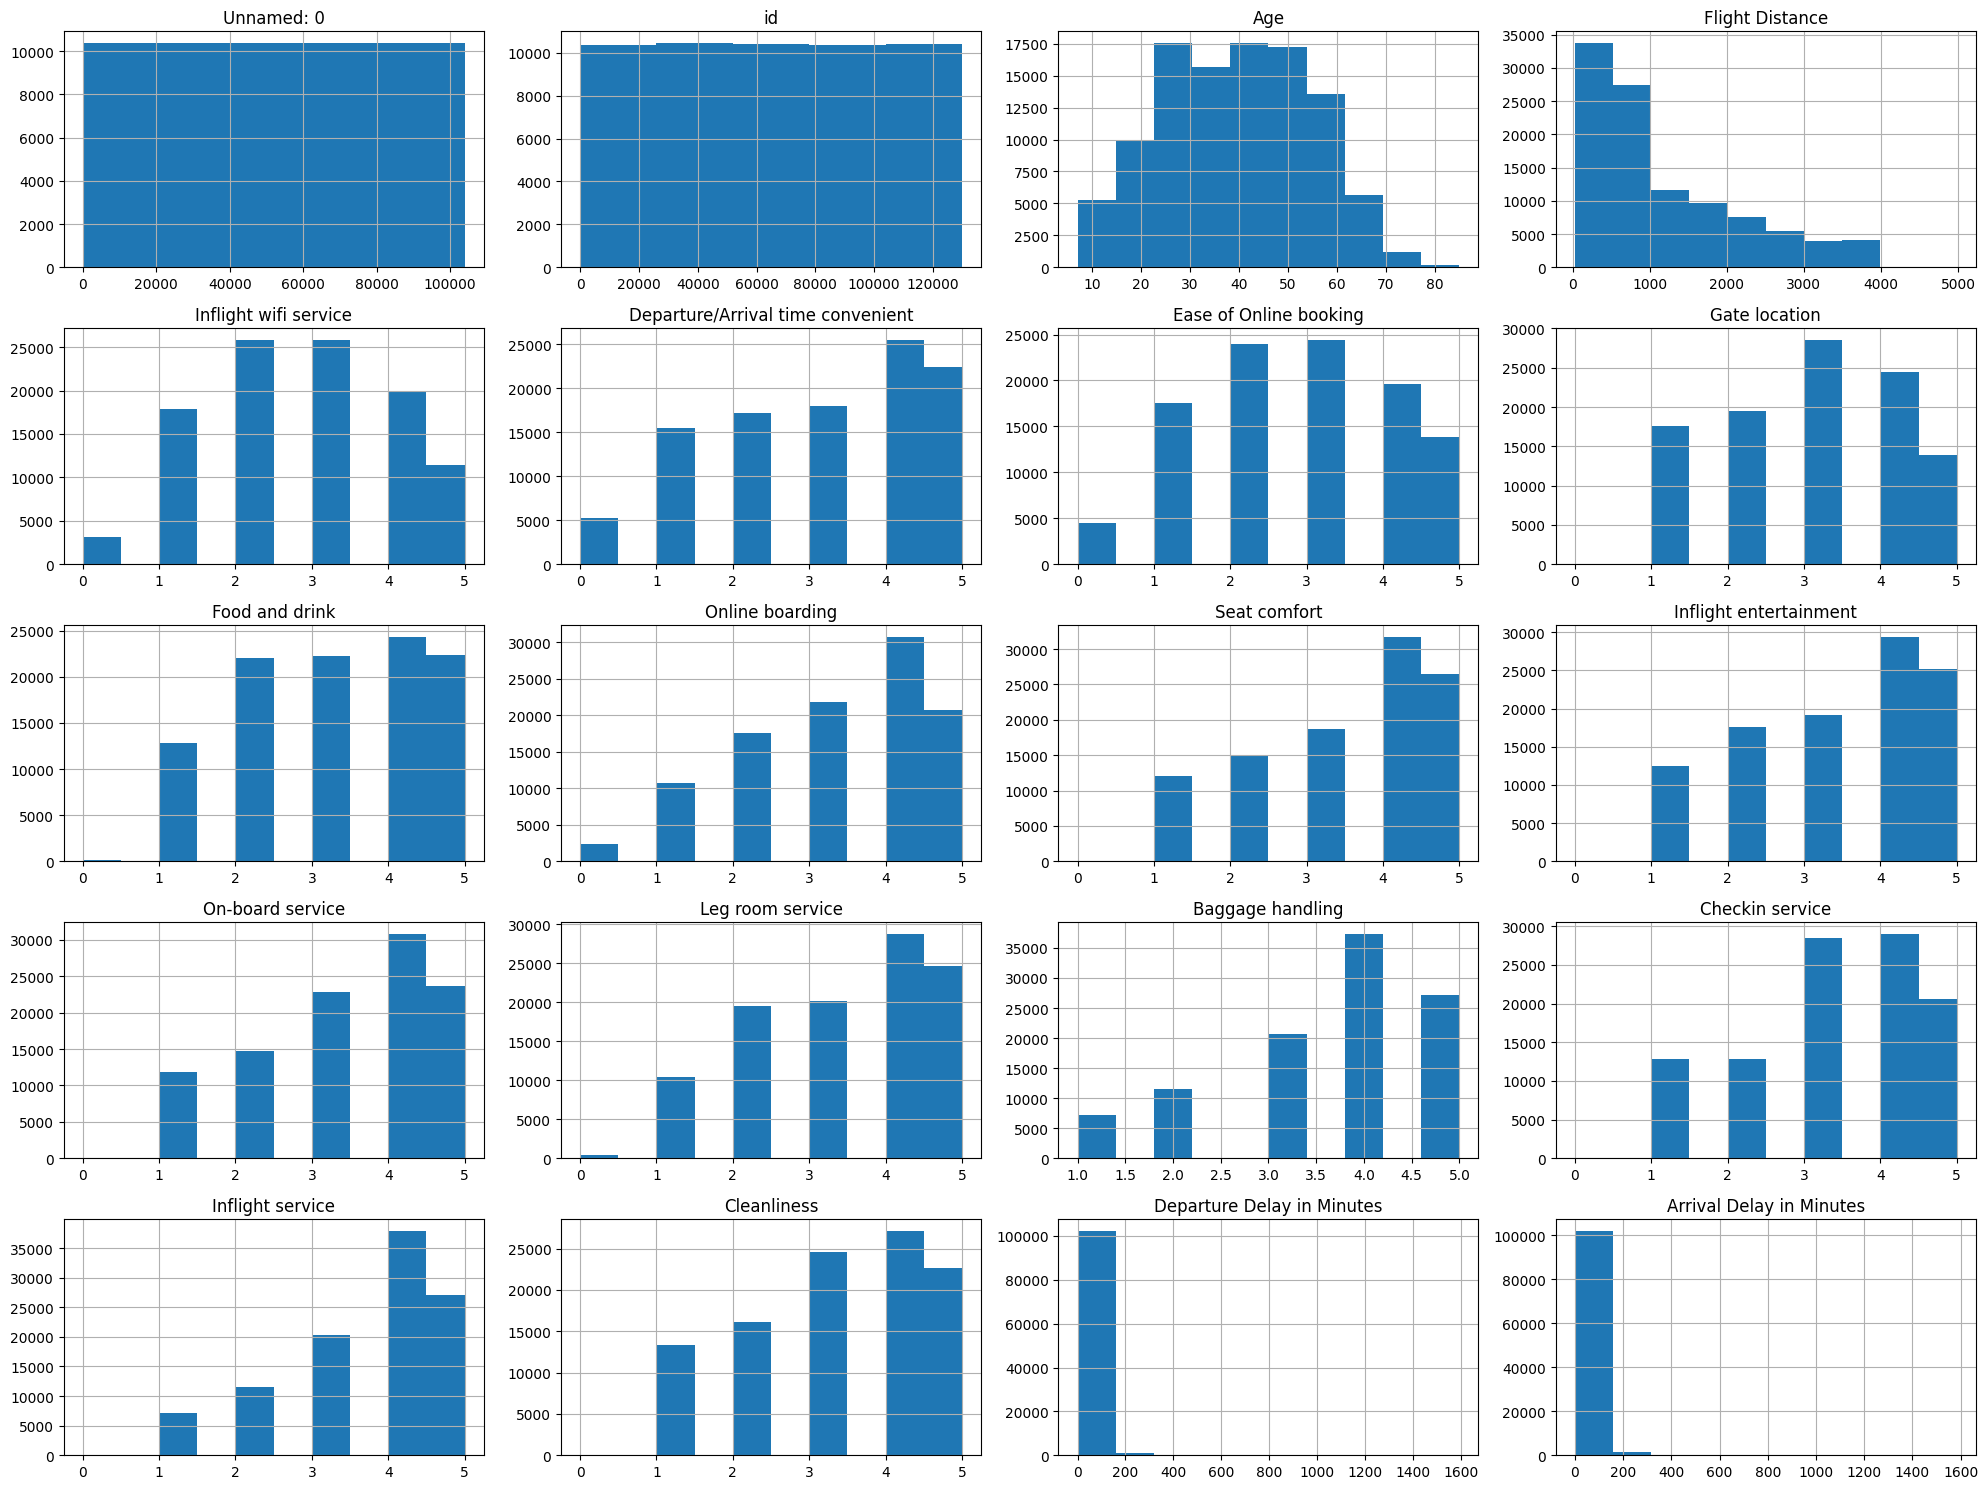

In [ ]:
#@markdown HIstogramas de todas las variables cuantitativas
data_train.hist(bins=10, figsize=(20,15)) #Para plotear el histograma de cada una de mis variables
plt.tight_layout() #No recuerdo
#plt.savefig('results/attribute_histogram_plots.pdf', format='pdf', dpi=300)#para grabar resultados en pdf
plt.show() #Renderizar

Los histogramas se deben normalizar ya que todos los datos se encuentran en unidades de minutos.

###Revisamos los histogramas de las variables categóricas
Para nuestra base de datos tenemos 5 variables de tipo categórica, estas son:
* 'Gender' (2)
* 'Customer Type' (3)
* 'Type of travel' (5)
* 'Class' (6)
* 'satisfaction' (24)

<Axes: xlabel='Gender', ylabel='count'>

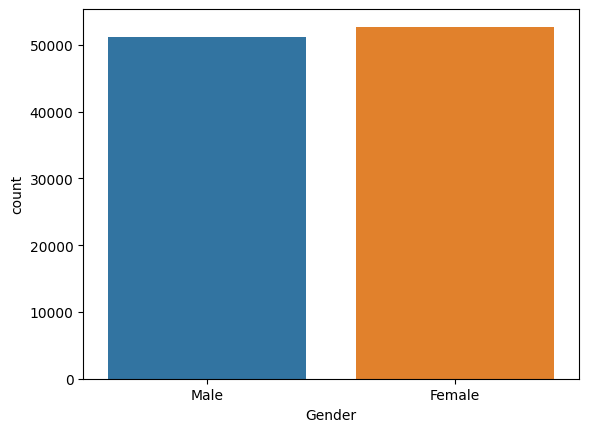

In [ ]:
#@markdown Histograma del atributo Gender
sns.countplot(data=data_train,x=data_train['Gender'])

<Axes: xlabel='Customer Type', ylabel='count'>

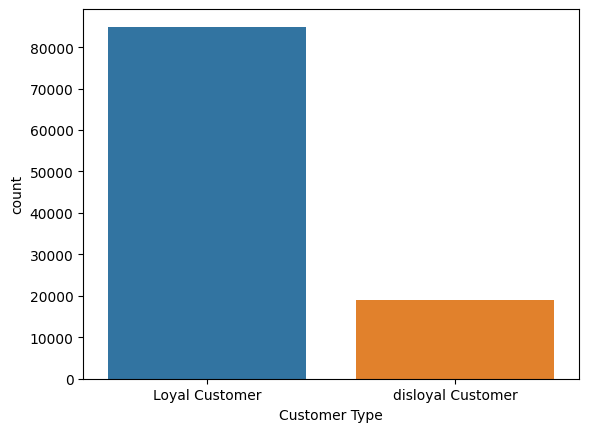

In [ ]:
#@markdown Histograma del atributo Customer Type
sns.countplot(data=data_train,x=data_train['Customer Type'])

<Axes: xlabel='Type of Travel', ylabel='count'>

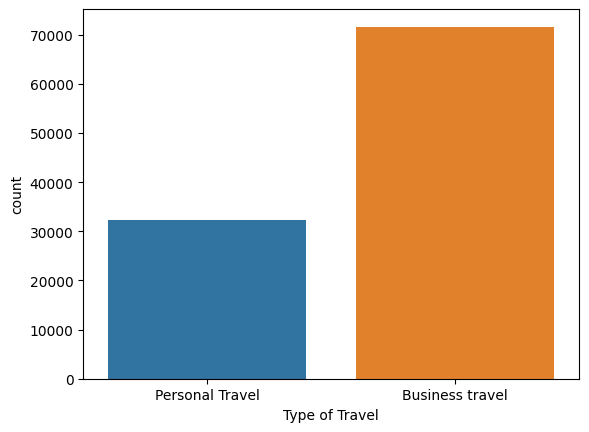

In [ ]:
#@markdown Histograma del atributo Type of travel
sns.countplot(data=data_train,x=data_train['Type of Travel'])

<Axes: xlabel='Class', ylabel='count'>

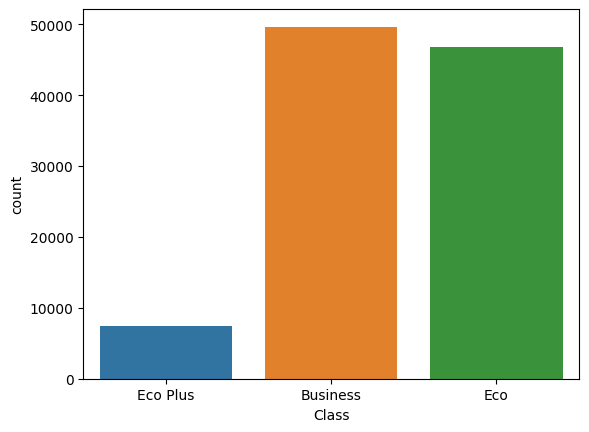

In [ ]:
#@markdown Histograma del atributo Class
sns.countplot(data=data_train,x=data_train['Class'])

<Axes: xlabel='satisfaction', ylabel='count'>

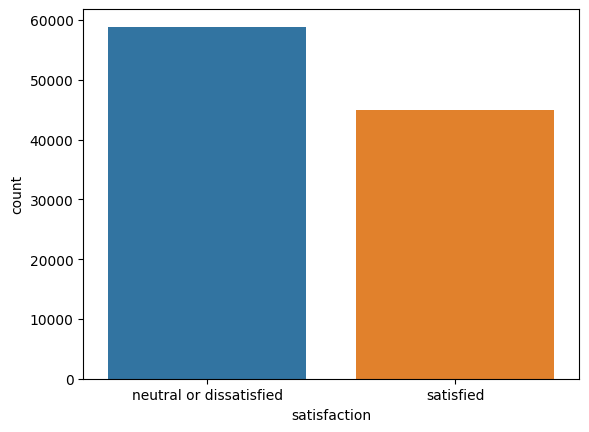

In [ ]:
#@markdown Histograma del atributo satisfaction
sns.countplot(data=data_train,x=data_train['satisfaction'])

###Comparativa entre variables
Empezaremos a comparar atributos que podrían tener relevancia o darnos alguna idea de la base de datos.

<Axes: xlabel='Class', ylabel='Flight Distance'>

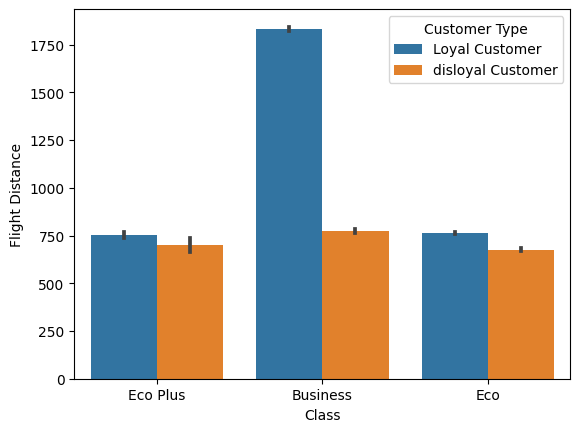

In [ ]:
#@markdown Class vs Tiempo de vuelo
sns.barplot(data=data_train,x='Class',y='Flight Distance',orient='v',hue='Customer Type')

<Axes: xlabel='satisfaction', ylabel='count'>

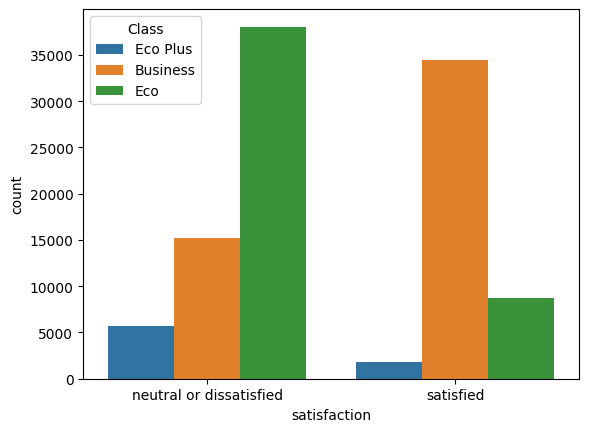

In [ ]:
#@markdown Class vs Satisfaction
sns.countplot(
            x=data_train['satisfaction'],
            hue=data_train['Class'],
            data=data_train
            )

In [ ]:
#@markdown Age vs satisfaction
#sns.barplot(data=data_train,x='Age',y='satisfaction',orient='v',hue='Customer Type')

CPU times: user 600 ms, sys: 163 ms, total: 763 ms
Wall time: 615 ms


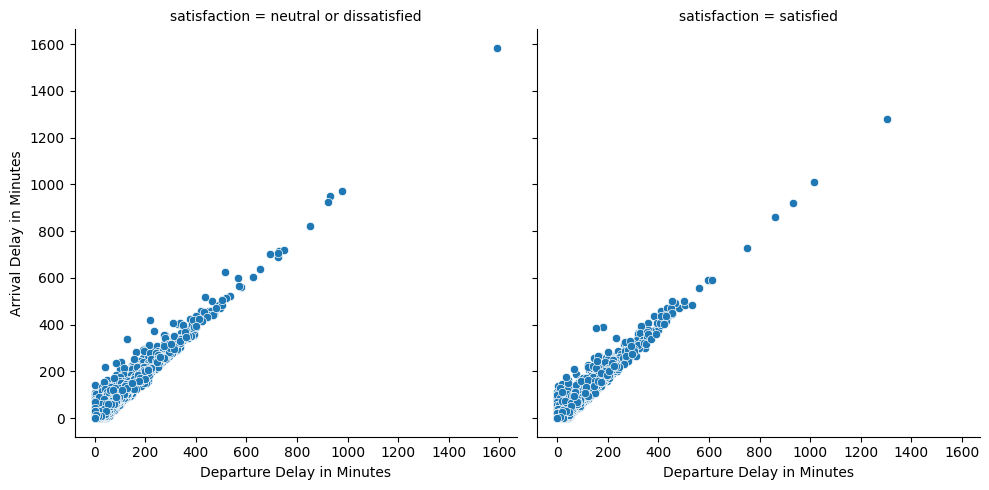

In [ ]:
#@markdown Arrival Delay vs Departure Delay para cuando están insatisfechos y satisfechos
%%time
sns.relplot(
    x ='Departure Delay in Minutes',
    y ='Arrival Delay in Minutes',
    data = data_train,
    kind ='scatter',
    col ='satisfaction');

La gente se sienta insatisfecha cuadno hay más delay en el tiempo de llegada que en el tiempo de salida.

##Pre-procesamiento del Dataset

###Eliminación de muestras del Dataset

In [ ]:
data_train.isna().sum() #Observamos que variables le hace falta

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

Como se puede observar hacen falta 310 muestras de la variable **Arrival Delay in Minutes**.

In [ ]:
data_train.dropna(inplace=True) #Train
data_test.dropna(inplace=True) #Test

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103594 non-null  int64  
 1   id                                 103594 non-null  int64  
 2   Gender                             103594 non-null  object 
 3   Customer Type                      103594 non-null  object 
 4   Age                                103594 non-null  int64  
 5   Type of Travel                     103594 non-null  object 
 6   Class                              103594 non-null  object 
 7   Flight Distance                    103594 non-null  int64  
 8   Inflight wifi service              103594 non-null  int64  
 9   Departure/Arrival time convenient  103594 non-null  int64  
 10  Ease of Online booking             103594 non-null  int64  
 11  Gate location                      1035

**Por lo tanto, quitamos 310 muestras de los demás atributos.**

###Eliminamos atributos que no nos interesan para nuestra base datos
En nuestro Dataset tenemos 2 variables que no nos interesan:
- UNNAMED: 0
- ID

In [ ]:
#@markdown Eliminamos el atributo UNNAMED
data_train.drop(columns='Unnamed: 0',axis=1,inplace=True) #Train
data_test.drop(columns='Unnamed: 0',axis=1,inplace=True) #Test

In [ ]:
#@markdown Eliminamos el atributo ID
data_train.drop(columns='id',axis=1,inplace=True) #Train
data_test.drop(columns='id',axis=1,inplace=True) #Test

###Preproceso variables categóricas a continuas
Para nuestra base de datos tenemos 5 variables de tipo categórica por lo que debemos volverlas continuas, estas son:
* 'Gender' (2)
* 'Customer Type' (3)
* 'Type of travel' (5)
* 'Class' (6)
* 'satisfaction' (24)

In [ ]:
#@markdown Con la clase LabelEncoder() pasamos las variables de tipo objeto (categóricas) a varaibles de tipo enteros y a su vez esta clase normaliza las muestras
le = LabelEncoder()

#TRAIN
for col in data_train.columns:
    if data_train[col].dtypes=='O':
        data_train[col]=le.fit_transform(data_train[col])

#TEST
for col in data_test.columns:
    if data_test[col].dtypes=='O':
        data_test[col]=le.fit_transform(data_test[col])

###Matriz de correlaciones

In [ ]:
#@markdown Graficamos la matriz de correlación
corr_matrix = data_train.corr() #función para calcular las correlaciones entre las variables
corr_matrix.style.background_gradient(cmap='coolwarm') #Para que nos muestre un indicativo con colores --> Poner bonita la matriz que obtenemos

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
Gender,1.000000,-0.031558,0.008921,0.006808,-0.012840,0.006079,0.008964,0.008846,0.007166,0.000213,0.005707,-0.042151,-0.026643,0.006071,0.008019,0.031842,0.037333,0.010438,0.038936,0.006439,0.002534,0.000396,0.012356
Customer Type,-0.031558,1.000000,-0.281821,-0.308268,0.042589,-0.225363,-0.007706,-0.207007,-0.019627,0.006294,-0.059554,-0.189477,-0.159722,-0.110106,-0.056374,-0.047809,0.024890,-0.032065,0.023055,-0.083757,0.004329,0.004747,-0.187558
Age,0.008921,-0.281821,1.000000,-0.048593,-0.117423,0.099838,0.017470,0.038038,0.024461,-0.001558,0.022920,0.208681,0.160302,0.076380,0.057123,0.040498,-0.047619,0.035003,-0.049899,0.053493,-0.010150,-0.012147,0.137040
Type of Travel,0.006808,-0.308268,-0.048593,1.000000,0.487001,-0.267642,-0.104879,0.259829,-0.133399,-0.030802,-0.063124,-0.224620,-0.123994,-0.147978,-0.056468,-0.138680,-0.031355,0.017043,-0.022492,-0.078767,-0.006046,-0.005683,-0.448995
Class,-0.012840,0.042589,-0.117423,0.487001,1.000000,-0.427509,-0.023046,0.089793,-0.094323,-0.004532,-0.076834,-0.296949,-0.209955,-0.178928,-0.207922,-0.197331,-0.164016,-0.157084,-0.158457,-0.125933,0.010105,0.014701,-0.449466
Flight Distance,0.006079,-0.225363,0.099838,-0.267642,-0.427509,1.000000,0.007050,-0.019908,0.065697,0.004732,0.056957,0.215191,0.157517,0.128645,0.109540,0.133839,0.063222,0.073224,0.057430,0.093121,0.001906,-0.002426,0.298915
Inflight wifi service,0.008964,-0.007706,0.017470,-0.104879,-0.023046,0.007050,1.000000,0.343758,0.715848,0.336127,0.134603,0.457002,0.122617,0.209513,0.121484,0.160485,0.121060,0.043178,0.110626,0.132652,-0.017451,-0.019095,0.284163
Departure/Arrival time convenient,0.008846,-0.207007,0.038038,0.259829,0.089793,-0.019908,0.343758,1.000000,0.437021,0.444601,0.005189,0.069990,0.011416,-0.004683,0.068604,0.012461,0.071901,0.093329,0.073227,0.014337,0.000791,-0.000864,-0.051718
Ease of Online booking,0.007166,-0.019627,0.024461,-0.133399,-0.094323,0.065697,0.715848,0.437021,1.000000,0.458746,0.031940,0.404093,0.030021,0.047185,0.038759,0.107431,0.038851,0.010957,0.035330,0.016192,-0.006292,-0.007984,0.171507
Gate location,0.000213,0.006294,-0.001558,-0.030802,-0.004532,0.004732,0.336127,0.444601,0.458746,1.000000,-0.001170,0.001451,0.003383,0.003564,-0.028532,-0.005868,0.002421,-0.035451,0.001742,-0.004015,0.005533,0.005143,0.000449


##Analizando la base de datos procesada

###Analizamos la correlación con respecto a nuestra variable de interés

In [ ]:
#@markdown Lista de las correlaciones con la variable de satisfacción
cor_target = abs(data_train.corr()[var_interes])
cor_target.sort_values(ascending=False)

satisfaction                         1.000000
Online boarding                      0.503447
Class                                0.449466
Type of Travel                       0.448995
Inflight entertainment               0.398203
Seat comfort                         0.349112
On-board service                     0.322450
Leg room service                     0.313182
Cleanliness                          0.305050
Flight Distance                      0.298915
Inflight wifi service                0.284163
Baggage handling                     0.247819
Inflight service                     0.244852
Checkin service                      0.235914
Food and drink                       0.209659
Customer Type                        0.187558
Ease of Online booking               0.171507
Age                                  0.137040
Arrival Delay in Minutes             0.057582
Departure/Arrival time convenient    0.051718
Departure Delay in Minutes           0.050515
Gender                            

##Modelos

###Asignamos variables a nuestro Dataset

In [ ]:
var_interes = 'satisfaction'
X_train=data_train.iloc[:,:-1]
y_train=data_train[var_interes]

X_test = data_test.iloc[:,:-1]
y_test = data_test[var_interes]

###**XGBoost**
XGBoost is an implementation of the Gradient Boosted Decision Trees algorithm (scikit-learn has another version of this algorithm, but XGBoost has some technical advantages.) What is Gradient Boosted Decision Trees? We'll walk through a diagram.

In [ ]:
from xgboost import XGBClassifier

#Hiperparámetros
n_estimators = 2
max_depth = 2
learning_rate = 0.001


xgb=XGBClassifier(n_estimators= n_estimators, max_depth = max_depth, learning_rate = learning_rate, objective='binary:logistic')
xgb.fit(X_train,y_train)
y_pred_xgb_train=xgb.predict(X_train)

####**Matriz de confusión**
- La matriz de confusión binaria, nos permite revelar la cantidad de verdaderos negativos, falsos positivos, falsos negativos y verdaderos positivos.

$$confusion-matrix=\begin{bmatrix}True Negative & False Positive \\
False Negative & True Positive
\end{bmatrix}$$

- Una clasificación perfecta deberá arrojar una matriz de confusión tipo diagonal.

In [ ]:
satisfaction_var = data_train[var_interes].value_counts() #Para saber cuantas hay de una clase
satisfaction_var

0    58697
1    44897
Name: satisfaction, dtype: int64

In [ ]:
#@markdown Porcentaje de Satisfecho
porcentage_satisfied_var = 58697/103594
porcentage_satisfied_var*100

56.660617410274725

In [ ]:
#@markdown Porcentaje de Insatisfecho
porcentage_dissatisfied_var = 44897/103594
porcentage_dissatisfied_var*100

43.339382589725275

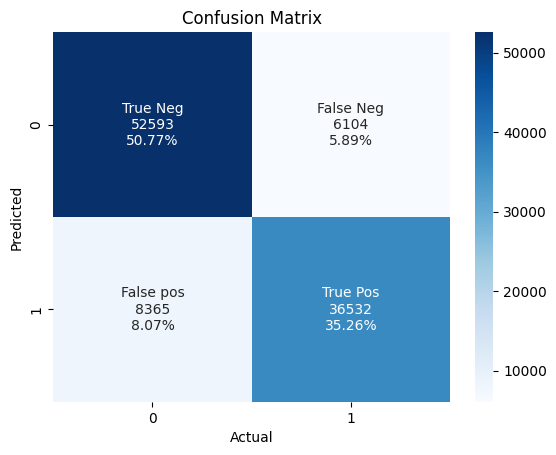

In [ ]:
#@markdown Matriz de confusión
from sklearn.metrics import confusion_matrix
group_names = ['True Neg','False Neg','False pos','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix(y_train,y_pred_xgb_train) .flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix(y_train,y_pred_xgb_train).flatten()/np.sum(confusion_matrix(y_train,y_pred_xgb_train))]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_train,y_pred_xgb_train), annot=labels, fmt='', cmap='Blues')

plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

* De la clase 0 (Insatisfecho) se tiene un acierto del 50.77% del total del porcentaje de muestras de insatisfecho que es 56.67%

* De a clase 1 (Satisfcho) se tiene un acierto del 35.26% del total del porcentaje de muestras de insatisfecho que es de 45.34%

####**Precision Score**

$$PrecisionScore=\frac{TruePositive}{TruePositive+FalsePositive}$$
Esto me indica que tan sesgado está a la etiqueta de interés (en este caso sería que tan bueno es clasificando la satisfacción) en una escala de 0 a 1.

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train, y_pred_xgb_train) # TP/(TP+FP)

0.8568345998686556

####**Recall Score**

$$RecallScore=\frac{TruePositive}{TruePositive+FalseNegative}$$

Que tan bueno es encontrando la etiqueta de interés pero que tanto se pifio.

In [ ]:
recall_score(y_train, y_pred_xgb_train) # TP/(TP+FN)

0.813684655990378

####**f1 Score**

$$f1score=\frac{2}{\frac{1}{Precision}+\frac{1}{Recall}}=\frac{TruePositive}{TruePositive+\frac{FalseNegative+FalsePositive}{2}}$$

Que tan bueno es mi modelo con la clase que es de interés y con la clase que no es de interés.

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_train, y_pred_xgb_train) # 2/(1/pre + 1/rec) = TP/(TP + (FN+FP)/2)

0.8347023408314579

#### **Score de decisión**

En muchas ocasiones, en problemas de clasificación, la robustez del modelo puede cuantificarse mejor a partir del score (generalmente definido como una probabilidad o una distancia a la forntera de decisión), en lugar de la umbralización del mismo = etiqueta.

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_train,y_pred_xgb_train))

0.8603297488271522


####**Curva ROC**

Característica Operativa del Receptor

- Generalmente, en problemas de analítica de datos se utiliza la [curva ROC](https://es.wikipedia.org/wiki/Curva_ROC) bajo el mismo principio de recall vs precision, y se relaciona con los conceptos de sensibilidad y especificidad (muy comunes en el área de salud).

$$FalsePositiveRate = \frac{FalsePositive}{\#samples}=1-specificity$$

$$TruePositiveRate = \frac{TruePositive}{TruePositive+FalseNegative}=sensitivity$$

- Los valores se cálculan variando el umbral de decisión del clasificador para generar una curva, la curva ROC

In [ ]:
#@markdown Definción de la función para plotear la curva ROC
def plot_roc_curve(fpr, tpr, label=None): #función para graficar curva roc
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') #clasificador aleatorio
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

In [ ]:
#@markdown Calculo de la curva ROC
from sklearn.metrics import roc_curve

# Obtener las probabilidades de predicción
y_scores_xgb = xgb.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_scores_xgb) # Fpr = FP/N -> 1 - especificidad , Tpr = TP/(TP+FN) -> exahustividad (recall, sensibilidad)
#especificidad = TN/(TN+FP)

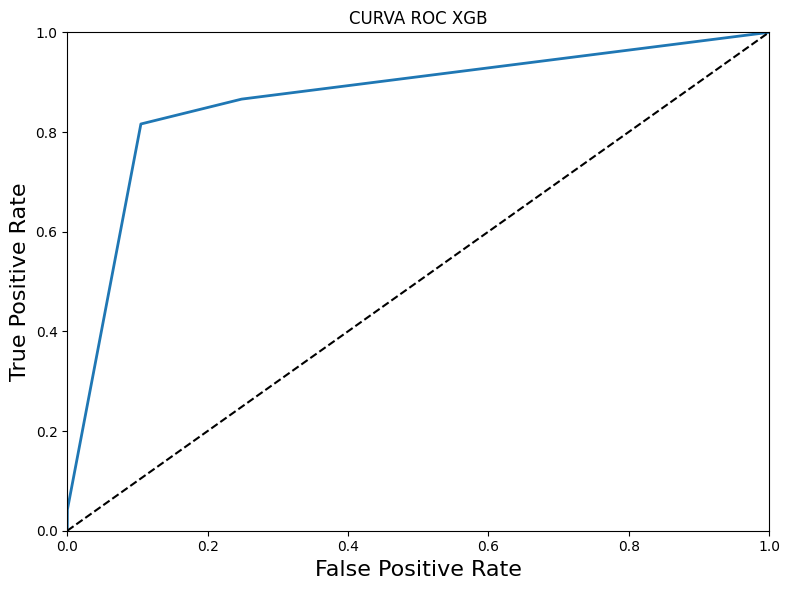

In [ ]:
#@markdown Gráfica de la curva ROC
plt.figure(figsize=(8, 6))
plt.title("CURVA ROC XGB")
plot_roc_curve(fpr_xgb, tpr_xgb)
plt.tight_layout()
plt.show()

#### A continuación se muestra una **tabla resumen** del **rendimiento** del modelo

In [ ]:
print(classification_report(y_train,y_pred_xgb_train))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88     58697
           1       0.86      0.81      0.83     44897

    accuracy                           0.86    103594
   macro avg       0.86      0.85      0.86    103594
weighted avg       0.86      0.86      0.86    103594



**1.Métricas por clase:**

**Para la clase 0(Insatisfecho), las métricas son:** \\
* Precisión (precision): **0.86,** lo que significa que el 86% de las muestras clasificadas como clase 0 son realmente de clase 0.


* Cobertura (recall): **0.90,** lo que indica que se clasificó correctamente el 90% de las muestras de clase 0.


* Valor F1 (F1-score): **0.88,** que es una medida combinada de precisión y cobertura.


* Soporte (support): 58697, que es el número de muestras en la clase 0.

**Para la clase 1 (Satisfecho), las métricas son:** \\
* Precisión (precision): **0.86**, lo que significa que el 86% de las muestras clasificadas como clase 1 son realmente de clase 1.


* Cobertura (recall): **0.81**, lo que indica que se clasificó correctamente el 81% de las muestras de clase 1.


* Valor F1 (F1-score): **0.83**, que es una medida combinada de precisión y cobertura.


* Soporte (support): 44897, que es el número de muestras en la clase 1.

**2.Métricas generales:**

Después de las métricas por clase, el informe muestra métricas generales que no están específicamente asociadas con una clase en particular.


* Accuracy (exactitud): **0.86**, que es la proporción de muestras clasificadas correctamente en general.


* Macro avg (promedio macro): Es el promedio no ponderado de las métricas por clase. En tu caso, es el promedio de las precisiones, coberturas y valores F1 de las dos clases. (REVISAR CONCEPTO)


* Weighted avg (promedio ponderado): Es el promedio ponderado de las métricas por clase, donde el peso es el soporte de cada clase. En tu caso, se tienen en cuenta las proporciones de las muestras en cada clase para calcular este promedio. (REVISAR CONCEPTO)

###**Logistic Regression**


Logistic regression is a special case of Generalized Linear Models with a Binomial / Bernoulli conditional distribution and a Logit link. The numerical output of the logistic regression, which is the predicted probability, can be used as a classifier by applying a threshold (by default 0.5) to it.

**1.** **Binary Class:** For notational ease, we assume that the target takes values in the set for data point . Once fitted, the predict_proba method of LogisticRegression predicts the probability of the positive class as $ y_i\{0,1\}i P(y_i = 1 | X_i) $

\begin{equation}
\hat{p}(X_i) = expit(X_iw+w_o) = \frac{1}{1+exp(-X_iw-w_o)}
\end{equation}


In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression object
lr_model = LogisticRegression()

# Train the model on the training data
lr_model.fit(X_train, y_train)

# Predict the class labels for the test data
y_pred_lr = lr_model.predict(X_test)

####**Matriz de confusión**
- La matriz de confusión binaria, nos permite revelar la cantidad de verdaderos negativos, falsos positivos, falsos negativos y verdaderos positivos.

$$confusion-matrix=\begin{bmatrix}True Negative & False Positive \\
False Negative & True Positive
\end{bmatrix}$$

- Una clasificación perfecta deberá arrojar una matriz de confusión tipo diagonal.

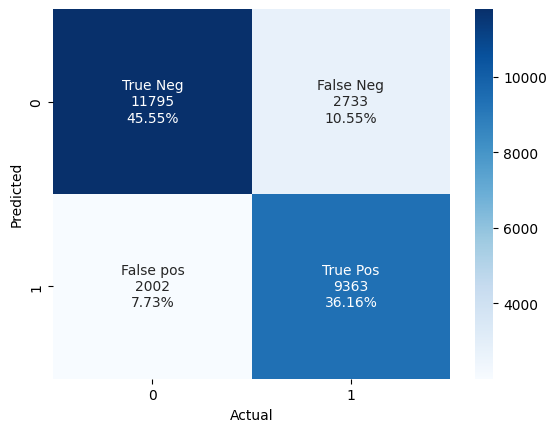

In [ ]:
#@markdown Matriz de confusión
group_names = ['True Neg','False Neg','False pos','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix(y_test,y_pred_lr) .flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix(y_test,y_pred_lr).flatten()/np.sum(confusion_matrix(y_test,y_pred_lr))]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_test,y_pred_lr), annot=labels, fmt='', cmap='Blues')

plt.xlabel("Actual")
plt.ylabel("Predicted")
# plt.title("Confusion Matrix")
plt.show()

* De la clase 0 (Insatisfecho) se tiene un acierto del 45.55% del total del porcentaje de muestras de insatisfecho que es 56.67%

* De a clase 1 (Satisfcho) se tiene un acierto del 35.26% del total del porcentaje de muestras de insatisfecho que es de 36.16%

####**Curva ROC**

Característica Operativa del Receptor

- Generalmente, en problemas de analítica de datos se utiliza la [curva ROC](https://es.wikipedia.org/wiki/Curva_ROC) bajo el mismo principio de recall vs precision, y se relaciona con los conceptos de sensibilidad y especificidad (muy comunes en el área de salud).

$$FalsePositiveRate = \frac{FalsePositive}{\#samples}=1-specificity$$

$$TruePositiveRate = \frac{TruePositive}{TruePositive+FalseNegative}=sensitivity$$

- Los valores se cálculan variando el umbral de decisión del clasificador para generar una curva, la curva ROC

In [ ]:
#@markdown Calculo de la curva Logistic Regression
from sklearn.metrics import roc_curve

# Obtener las probabilidades de predicción
y_scores_lr = lr_model.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_scores_lr) # Fpr = FP/N -> 1 - especificidad , Tpr = TP/(TP+FN) -> exahustividad (recall, sensibilidad)
#especificidad = TN/(TN+FP)

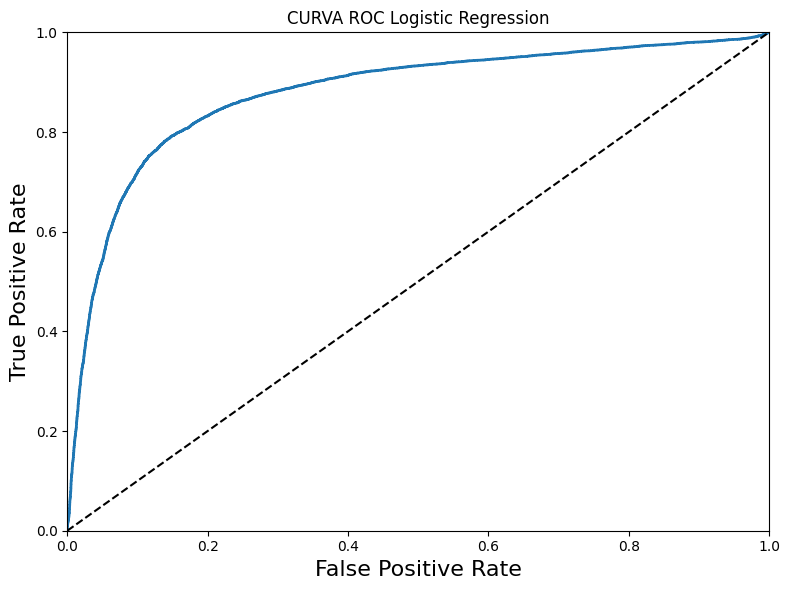

In [ ]:
#@markdown Gráfica de la curva Logistic Regression
plt.figure(figsize=(8, 6))
plt.title("CURVA ROC Logistic Regression")
plot_roc_curve(fpr_lr, tpr_lr)
plt.tight_layout()
plt.show()

#### A continuación se muestra una **tabla resumen** del **rendimiento** del modelo

In [ ]:
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83     14528
           1       0.77      0.82      0.80     11365

    accuracy                           0.82     25893
   macro avg       0.81      0.82      0.82     25893
weighted avg       0.82      0.82      0.82     25893



**1.Métricas por clase:**

**Para la clase 0(Insatisfecho), las métricas son:** \\
* Precisión (precision): **0.85,** lo que significa que el 85% de las muestras clasificadas como clase 0 son realmente de clase 0.


* Cobertura (recall): **0.81,** lo que indica que se clasificó correctamente el 81% de las muestras de clase 0.


* Valor F1 (F1-score): **0.83,** que es una medida combinada de precisión y cobertura.


* Soporte (support): 14528, que es el número de muestras en la clase 0.

**Para la clase 1 (Satisfecho), las métricas son:** \\
* Precisión (precision): **0.77**, lo que significa que el 77% de las muestras clasificadas como clase 1 son realmente de clase 1.


* Cobertura (recall): **0.82**, lo que indica que se clasificó correctamente el 82% de las muestras de clase 1.


* Valor F1 (F1-score): **0.80**, que es una medida combinada de precisión y cobertura.


* Soporte (support): 11365, que es el número de muestras en la clase 1.

**2.Métricas generales:**

Después de las métricas por clase, el informe muestra métricas generales que no están específicamente asociadas con una clase en particular.


* Accuracy (exactitud): **0.82**, que es la proporción de muestras clasificadas correctamente en general.


* Macro avg (promedio macro): Es el promedio no ponderado de las métricas por clase. En tu caso, es el promedio de las precisiones, coberturas y valores F1 de las dos clases. (REVISAR CONCEPTO)


* Weighted avg (promedio ponderado): Es el promedio ponderado de las métricas por clase, donde el peso es el soporte de cada clase. En tu caso, se tienen en cuenta las proporciones de las muestras en cada clase para calcular este promedio. (REVISAR CONCEPTO)

###**Random Forest**


In random forests (RandomForestClassifier and RandomForestRegressor classes), each tree in the ensemble is built from a sample drawn with replacement (i.e., a bootstrap sample) from the training set. //

The purpose of these two sources of randomness is to decrease the variance of the forest estimator. Indeed, individual decision trees typically exhibit high variance and tend to overfit. The injected randomness in forests yield decision trees with somewhat decoupled prediction errors. By taking an average of those predictions, some errors can cancel out. Random forests achieve a reduced variance by combining diverse trees, sometimes at the cost of a slight increase in bias. In practice the variance reduction is often significant hence yielding an overall better model.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

n_estimators = 100

# Create a random forest object
rf_model = RandomForestClassifier(n_estimators=n_estimators)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Predict the class labels for the test data
y_pred_rf = rf_model.predict(X_test)

####**Matriz de confusión**
- La matriz de confusión binaria, nos permite revelar la cantidad de verdaderos negativos, falsos positivos, falsos negativos y verdaderos positivos.

$$confusion-matrix=\begin{bmatrix}True Negative & False Positive \\
False Negative & True Positive
\end{bmatrix}$$

- Una clasificación perfecta deberá arrojar una matriz de confusión tipo diagonal.

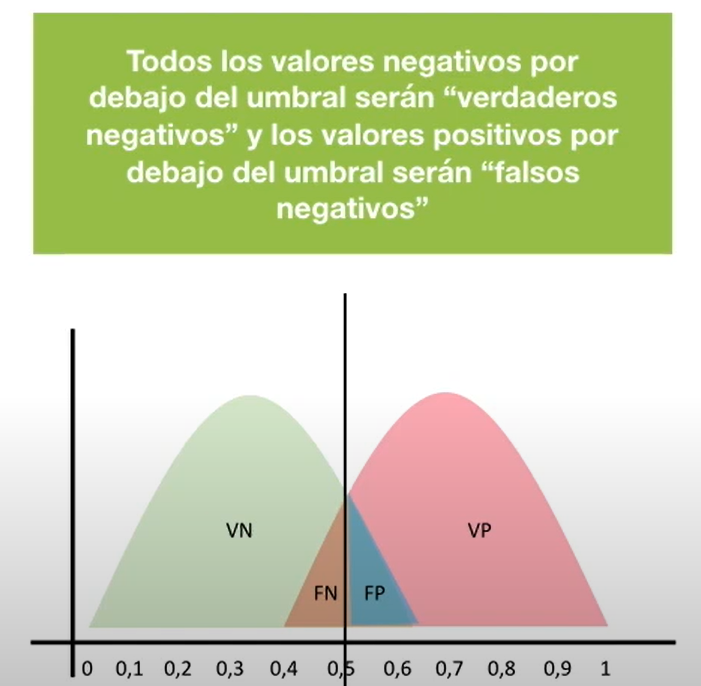


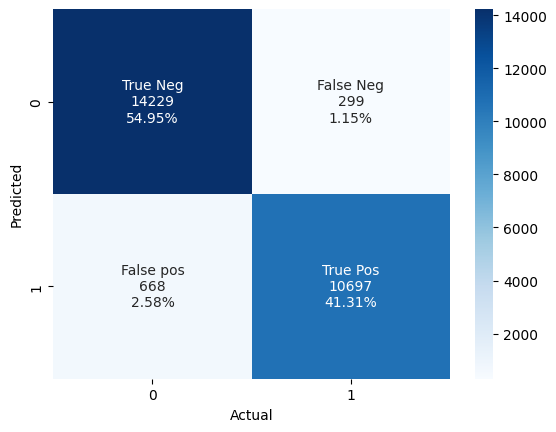

In [ ]:
#@markdown Matriz de confusión
group_names = ['True Neg','False Neg','False pos','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix(y_test,y_pred_rf) .flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     confusion_matrix(y_test,y_pred_rf).flatten()/np.sum(confusion_matrix(y_test,y_pred_rf))]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_test,y_pred_rf), annot=labels, fmt='', cmap='Blues')

plt.xlabel("Actual")
plt.ylabel("Predicted")
# plt.title("Confusion Matrix")
plt.show()

* De la clase 0 (Insatisfecho) se tiene un acierto del 45.55% del total del porcentaje de muestras de insatisfecho que es 54.92%

* De a clase 1 (Satisfcho) se tiene un acierto del 35.26% del total del porcentaje de muestras de insatisfecho que es de 41.34%

####**Curva ROC**

Característica Operativa del Receptor

- Generalmente, en problemas de analítica de datos se utiliza la [curva ROC](https://es.wikipedia.org/wiki/Curva_ROC) bajo el mismo principio de recall vs precision, y se relaciona con los conceptos de sensibilidad y especificidad (muy comunes en el área de salud).

$$FalsePositiveRate = \frac{FalsePositive}{\#samples}=1-specificity$$

$$TruePositiveRate = \frac{TruePositive}{TruePositive+FalseNegative}=sensitivity$$

- Los valores se cálculan variando el umbral de decisión del clasificador para generar una curva, la curva ROC



In [ ]:
from sklearn.metrics import roc_curve

# Obtener las probabilidades de predicción
y_scores_rf = rf_model.predict_proba(X_test)[:, 1]

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_scores_rf) # Fpr = FP/N -> 1 - especificidad , Tpr = TP/(TP+FN) -> exahustividad (recall, sensibilidad)
#especificidad = TN/(TN+FP)

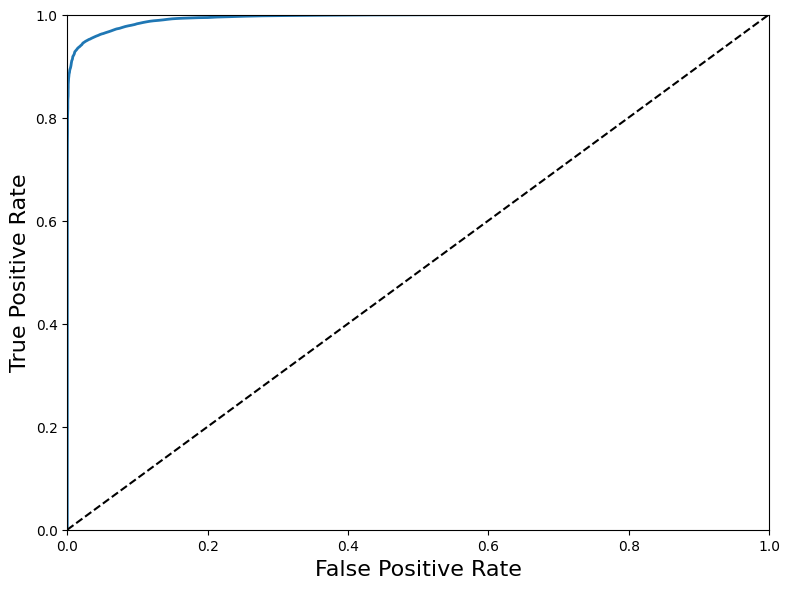

In [ ]:
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_rf, tpr_rf)
plt.tight_layout()
plt.show()

#### A continuación se muestra una **tabla resumen** del **rendimiento** del modelo

In [ ]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     14528
           1       0.97      0.94      0.96     11365

    accuracy                           0.96     25893
   macro avg       0.96      0.96      0.96     25893
weighted avg       0.96      0.96      0.96     25893



**1.Métricas por clase:**

**Para la clase 0(Insatisfecho), las métricas son:** \\
* Precisión (precision): **0.96,** lo que significa que el 96% de las muestras clasificadas como clase 0 son realmente de clase 0.


* Cobertura (recall): **0.98,** lo que indica que se clasificó correctamente el 98% de las muestras de clase 0.


* Valor F1 (F1-score): **0.83,** que es una medida combinada de precisión y cobertura.


* Soporte (support): 14528, que es el número de muestras en la clase 0.

**Para la clase 1 (Satisfecho), las métricas son:** \\
* Precisión (precision): **0.97**, lo que significa que el 97% de las muestras clasificadas como clase 1 son realmente de clase 1.


* Cobertura (recall): **0.94**, lo que indica que se clasificó correctamente el 94% de las muestras de clase 1.


* Valor F1 (F1-score): **0.96**, que es una medida combinada de precisión y cobertura.


* Soporte (support): 11365, que es el número de muestras en la clase 1.

**2.Métricas generales:**

Después de las métricas por clase, el informe muestra métricas generales que no están específicamente asociadas con una clase en particular.


* Accuracy (exactitud): **0.96**, que es la proporción de muestras clasificadas correctamente en general.


* Macro avg (promedio macro): Es el promedio no ponderado de las métricas por clase. En tu caso, es el promedio de las precisiones, coberturas y valores F1 de las dos clases. (REVISAR CONCEPTO)


* Weighted avg (promedio ponderado): Es el promedio ponderado de las métricas por clase, donde el peso es el soporte de cada clase. En tu caso, se tienen en cuenta las proporciones de las muestras en cada clase para calcular este promedio. (REVISAR CONCEPTO)

####**DASHBOARD**

In [ ]:
#@markdown Dashboard
import pickle
pickle.dump(rf_model,open('modelo_rf.pkl', 'wb'))
pickle.dump([X_test,y_test],open("datos_rf.pkl", 'wb'))

##Conclusiones y resultados

In [ ]:
#@markdown Decisión del mejor modelo
# Agrupar los modelos en una lista
models = [xgb,lr_model,rf_model]

# Calcular el score de clasificación para cada modelo
score_rf = rf_model.score(X_test, y_test)
score_lr = lr_model.score(X_test, y_test)
score_xgb = xgb.score(X_test, y_test)

# Determinar el modelo con el mejor score
best_model_index = np.argmax([score_xgb,score_lr,score_rf])
best_model = models[best_model_index]
best_score = max(score_rf, score_lr, score_xgb)

# Imprimir el mejor modelo y su score
print("Mejor modelo:", type(best_model).__name__)
print("Mejor score:", best_score)

Mejor modelo: RandomForestClassifier
Mejor score: 0.9626539991503495


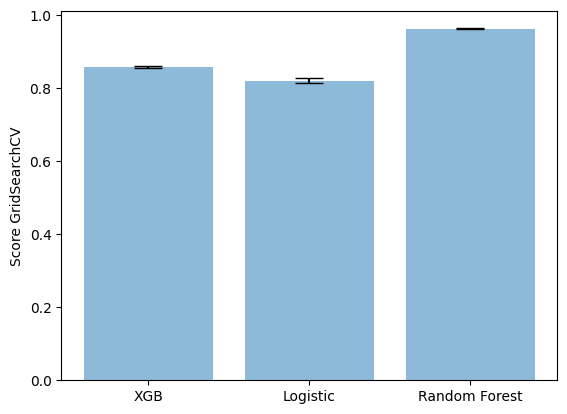

['XGB', 'Logistic', 'Random Forest']
[[0.858 0.82  0.963]
 [0.002 0.006 0.001]]


In [ ]:
#@markdown Gráfica con los score y las desviaciones de cada modelo
from sklearn.model_selection import GridSearchCV

# Agrupar los modelos en una lista
models = [xgb, lr_model, rf_model]

# Etiquetas de los modelos
label_models = ['XGB', 'Logistic', 'Random Forest']

# Recorrer los modelos
bars_ = np.zeros((2, len(models)))  # arreglo de barras para graficar mejores modelos en promedio con std
for i in range(len(models)):
    grid_search = GridSearchCV(models[i], param_grid={}, cv=5)  # Realizar GridSearchCV vacío para obtener los resultados
    grid_search.fit(X_train, y_train)  # Ajustar el GridSearchCV al conjunto de entrenamiento
    ind = grid_search.best_index_  # Índice del mejor score de clasificación
    bars_[0, i] = grid_search.cv_results_['mean_test_score'][ind]  # guardar score promedio del mejor modelo
    bars_[1, i] = grid_search.cv_results_['std_test_score'][ind]  # guardar std del mejor modelo

plt.bar(np.arange(len(models)), bars_[0], yerr=bars_[1], align='center', alpha=0.5, ecolor='black', capsize=10)
plt.ylabel('Score GridSearchCV')
plt.xticks(np.arange(len(models)))
plt.gca().set_xticklabels(label_models)
plt.show()

print(label_models)
print(np.round(bars_, 3))

Como se observa se tiene que:

* **[0.858 0.82  0.962]** - > Corresponden a los score de rendimiento de los modelos. El **mejor score** lo logra **Random Forest**

* **[0.002 0.006 0.001]** -> Corresponde a las desviaciones estándar de los modelos. Estas desviaciones estándar representan la variabilidad o dispersión de los puntajes durante la validación cruzada. Estos valores  de los modelos son muy bajos, esto significa que el rendimiento y la consistencia de los modelos en diferentes divisiones del conjunto de datos durante la validación cruzada tuvieron poca variabilidad.Valores más bajos indican una menor variabilidad. La **mejor desviación estándar** la logra **Random Forest**

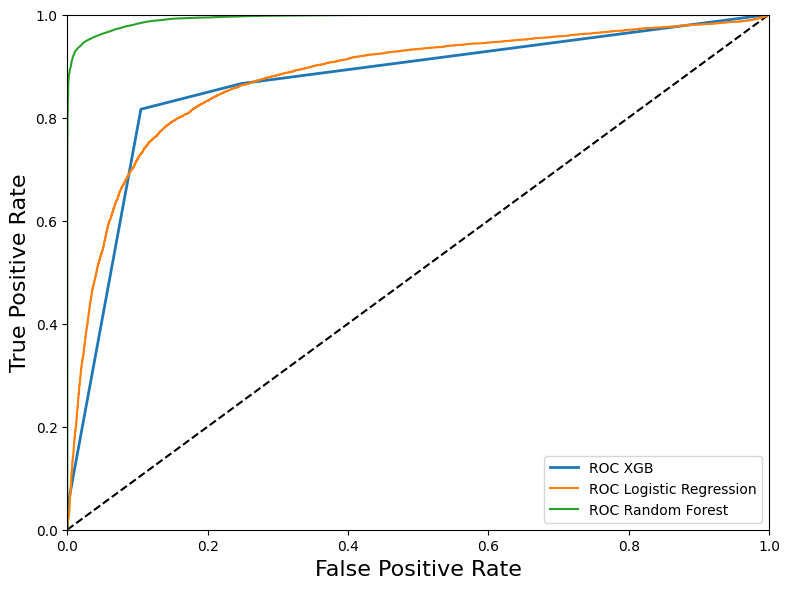

In [ ]:
#@markdown Curvas ROC de los modelos
plt.figure(figsize=(8, 6))
plot_roc_curve(fpr_xgb, tpr_xgb, label="ROC XGB")
plt.plot(fpr_lr,tpr_lr, label="ROC Logistic Regression")
plt.plot(fpr_rf,tpr_rf,label="ROC Random Forest")
plt.tight_layout()
plt.legend()
plt.show()

Nos dice que tan bueno puede distinguir el modelo entre dos clases.

Recordemos: La sensibilidad es la proporción de personas que se identificaron correctamente satisfechas, sobre el # total

$$sensibilidad=\frac{TruePositive}{TruePositive+FalseNegative}$$

$$especifidad = \frac{TrueNegative}{TrueNegative+FalsePositive}$$

La especifidad es la proporción de personas que se identificaron correctamente insatisfechas, sobre el # total de personas insatisfechas

$$FalsePositiveRate = \frac{FalsePositive}{\#samples}=1-specificity$$

**Sensibilidad que es la tasa de verdadero positivo**


**1-especifidad que es la tasa de falso positivo**

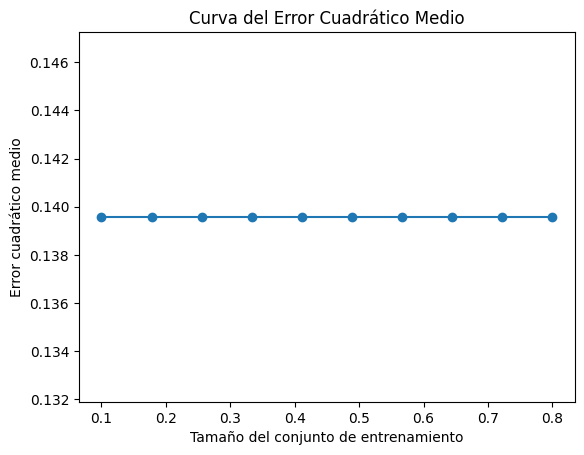

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

#Cálculo del ECM para diferentes tamaños de conjunto de entrenamiento
train_sizes = np.linspace(0.1, 0.8, 10)

mse_values_xgb = []

for size in train_sizes:
    # Divide los datos en conjunto de entrenamiento y conjunto de prueba con el tamaño actual
    X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=size, random_state=42)

    rf_model.fit(X_train_subset, y_train_subset)
    y_pred_xgb_subset = xgb.predict(X_test)
    mse_xgb = mean_squared_error(y_test, y_pred_xgb_subset)
    mse_values_xgb.append(mse_xgb)

#Graficar la curva del ECM
# plt.plot(train_sizes, mse_values_rf, marker='o')
plt.plot(train_sizes, mse_values_xgb, marker='o')
# plt.plot(train_sizes, mse_values_lr, marker='o')
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Error cuadrático medio')
plt.title('Curva del Error Cuadrático Medio')
plt.show()

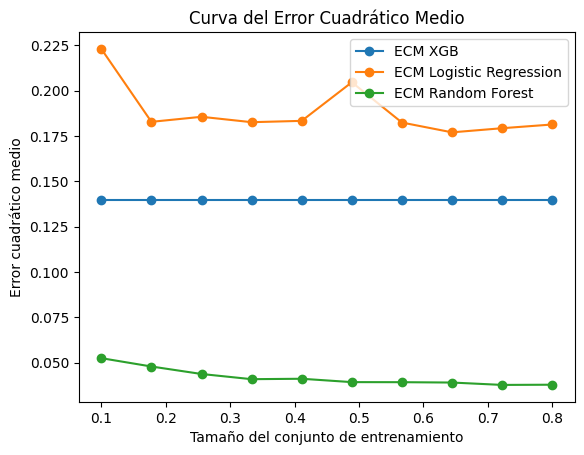

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

#Cálculo del ECM para diferentes tamaños de conjunto de entrenamiento
train_sizes = np.linspace(0.1, 0.8, 10)

mse_values_xgb = []
mse_values_lr = []
mse_values_rf = []
for size in train_sizes:
    # Divide los datos en conjunto de entrenamiento y conjunto de prueba con el tamaño actual
    X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, train_size=size, random_state=42)

    # Entrena el modelo y calcula el ECM en el conjunto de prueba
    rf_model.fit(X_train_subset, y_train_subset)
    y_pred_rf_subset = rf_model.predict(X_test)
    mse_rf = mean_squared_error(y_test, y_pred_rf_subset)
    mse_values_rf.append(mse_rf)

    rf_model.fit(X_train_subset, y_train_subset)
    y_pred_xgb_subset = xgb.predict(X_test)
    mse_xgb = mean_squared_error(y_test, y_pred_xgb_subset)
    mse_values_xgb.append(mse_xgb)

    lr_model.fit(X_train_subset, y_train_subset)
    y_pred_lr_subset = lr_model.predict(X_test)
    mse_lr = mean_squared_error(y_test, y_pred_lr_subset)
    mse_values_lr.append(mse_lr)

#Graficar la curva del ECM
plt.plot(train_sizes, mse_values_xgb, marker='o',label= "ECM XGB")
plt.plot(train_sizes, mse_values_lr, marker='o',label= "ECM Logistic Regression")
plt.plot(train_sizes, mse_values_rf, marker='o',label= "ECM Random Forest")
plt.xlabel('Tamaño del conjunto de entrenamiento')
plt.ylabel('Error cuadrático medio')
plt.title('Curva del Error Cuadrático Medio')
plt.legend()
plt.show() #8755


###**Aprendizaje profundo**

In [ ]:
data_train.shape

(103594, 23)

In [ ]:

import tensorflow as tf

# Define los hiperparámetros
input_size = 22
hidden_size = 64
output_size = 1
learning_rate = 0.001
epochs = 20

var_interes = 'satisfaction'
X_train=data_train.iloc[:,:-1]
y_train=data_train[var_interes]

In [ ]:
X_train.shape

(103594, 22)

In [ ]:
y_train.shape

(103594,)

In [ ]:
# Crea el modelo de la red neuronal
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(hidden_size, activation='relu', input_shape=(input_size,)),
    tf.keras.layers.Dense(output_size, activation='sigmoid')
])

In [ ]:
#Compila el modelo
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
#Entrena el modelo
model.fit(X_train, y_train, epochs=epochs)

Epoch 1/20
3238/3238 [==============================] - 7s 2ms/step - loss: 0.6014 - accuracy: 0.7889
Epoch 2/20
3238/3238 [==============================] - 7s 2ms/step - loss: 0.5188 - accuracy: 0.8210
Epoch 3/20
3238/3238 [==============================] - 6s 2ms/step - loss: 0.5167 - accuracy: 0.8252
Epoch 4/20
3238/3238 [==============================] - 6s 2ms/step - loss: 0.4605 - accuracy: 0.8412
Epoch 5/20
3238/3238 [==============================] - 6s 2ms/step - loss: 0.4404 - accuracy: 0.8493
Epoch 6/20
3238/3238 [==============================] - 6s 2ms/step - loss: 0.4119 - accuracy: 0.8566
Epoch 7/20
3238/3238 [==============================] - 6s 2ms/step - loss: 0.3924 - accuracy: 0.8649
Epoch 8/20
3238/3238 [==============================] - 6s 2ms/step - loss: 0.3621 - accuracy: 0.8715
Epoch 9/20
3238/3238 [==============================] - 7s 2ms/step - loss: 0.3520 - accuracy: 0.8760
Epoch 10/20
3238/3238 [==============================] - 6s 2ms/step - loss: 0.328

In [ ]:
X_test = data_test.iloc[:,:-1]
y_test = data_test[var_interes]

In [ ]:
model.evaluate(X_test, y_test)

810/810 [==============================] - 1s 1ms/step - loss: 0.3730 - accuracy: 0.8734


[0.37298646569252014, 0.8733634352684021]

In [ ]:
#@title Dashboard
import pickle
pickle.dump(model,open('modelo_dl.pkl', 'wb'))
pickle.dump([X_test,y_test],open("datos_dl.pkl", 'wb'))

In [ ]:
#@title Ensayando el modelo realizado
X_new = X_test[:10]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 84ms/step


array([[0.98],
       [0.92],
       [0.  ],
       [0.73],
       [0.  ],
       [0.3 ],
       [0.02],
       [0.86],
       [0.99],
       [0.94]], dtype=float32)

In [ ]:
y_pred = model.predict(X_new).argmax(axis=1) #podemos utilizar argmax para estimar la salida ordinal
y_pred

1/1 [==============================] - 0s 31ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
X_new2= X_test[:5]
y_proba = model.predict(X_new2)
y_proba.round(2)

1/1 [==============================] - 0s 22ms/step


array([[0.98],
       [0.92],
       [0.  ],
       [0.73],
       [0.  ]], dtype=float32)

In [ ]:
y_pred = model.predict(X_new2).argmax(axis=1) #podemos utilizar argmax para estimar la salida ordinal
y_pred

1/1 [==============================] - 0s 22ms/step


array([0, 0, 0, 0, 0])

In [ ]:
#@title Regresión MLP
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
var_interes = 'satisfaction'
X_train_full=data_train.iloc[:,:-1]
y_train_full=data_train[var_interes]

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(2, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1) #se fija una única con activacion lineal
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=0.1))
history  = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))


Epoch 1/10
2428/2428 [==============================] - 6s 2ms/step - loss: 0.1716 - val_loss: 0.1254
Epoch 2/10
2428/2428 [==============================] - 6s 2ms/step - loss: 0.1166 - val_loss: 0.1138
Epoch 3/10
2428/2428 [==============================] - 4s 2ms/step - loss: 0.1113 - val_loss: 0.1113
Epoch 4/10
2428/2428 [==============================] - 5s 2ms/step - loss: 0.1099 - val_loss: 0.1105
Epoch 5/10
2428/2428 [==============================] - 5s 2ms/step - loss: 0.1092 - val_loss: 0.1100
Epoch 6/10
2428/2428 [==============================] - 4s 2ms/step - loss: 0.1084 - val_loss: 0.1092
Epoch 7/10
2428/2428 [==============================] - 5s 2ms/step - loss: 0.1073 - val_loss: 0.1079
Epoch 8/10
2428/2428 [==============================] - 4s 2ms/step - loss: 0.1060 - val_loss: 0.1062
Epoch 9/10
2428/2428 [==============================] - 5s 2ms/step - loss: 0.1047 - val_loss: 0.1052
Epoch 10/10
2428/2428 [==============================] - 5s 2ms/step - loss: 0.103

In [ ]:
mse_test = model.evaluate(X_test, y_test)
X_new    = X_test[:100]
y_pred   = model.predict(X_new)

4/4 [==============================] - 0s 3ms/step


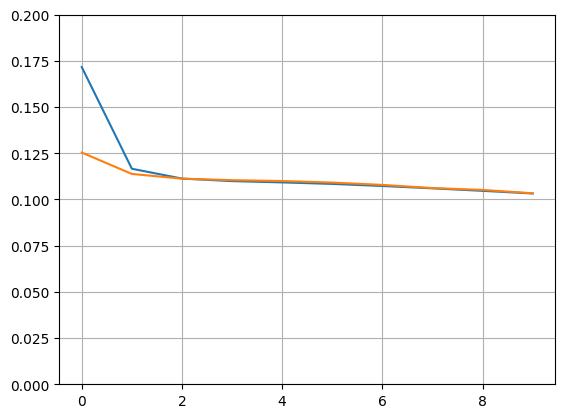

In [ ]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 0.2)
plt.show()

In [ ]:
array1= y_pred
array_1 = np.array([int(x) for x in array1])
array_1

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
array2=y_test[:100]
array_2 = np.array([int(x) for x in array2])
array_2

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0])

In [ ]:
result = array_1 == array_2
print(result)

[False False  True False False False  True False False False False  True
 False False False  True  True False  True  True False  True  True False
  True  True False False False  True  True False  True  True False  True
 False  True  True  True  True False  True False  True False  True  True
  True  True  True False False  True False  True False  True  True  True
 False  True  True False False  True  True  True False False  True  True
  True False  True  True  True  True  True  True False  True  True  True
  True  True  True False  True  True  True  True False  True False  True
  True False  True  True]


In [ ]:
count_true = np.count_nonzero(result)

print(count_true)

61


In [ ]:
score_rf = rf_model.score(X_test, y_test)
score_rf

0.3134824083729193